<a href="https://colab.research.google.com/github/SifolDifol/HomeWorkForCourse/blob/pandas-%2F-numpy/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. В исходных данных стандартизируйте исходный признак price_doc

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn import preprocessing

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
sber_data = pd.read_csv('drive/MyDrive/Colab Notebooks/dataForWork/sber_data.csv')

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='price_doc', ylabel='Density'>

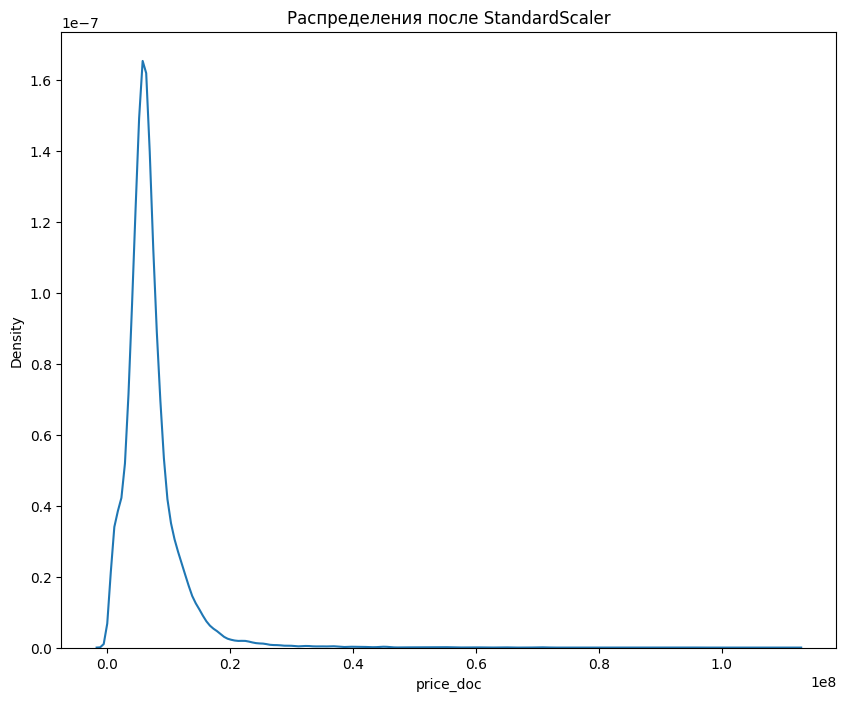

In [17]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(sber_data['price_doc'], ax=ax1)

2. В исходны хданных найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения.
Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обестороны распределения. Сколько выбросов вы получили ?

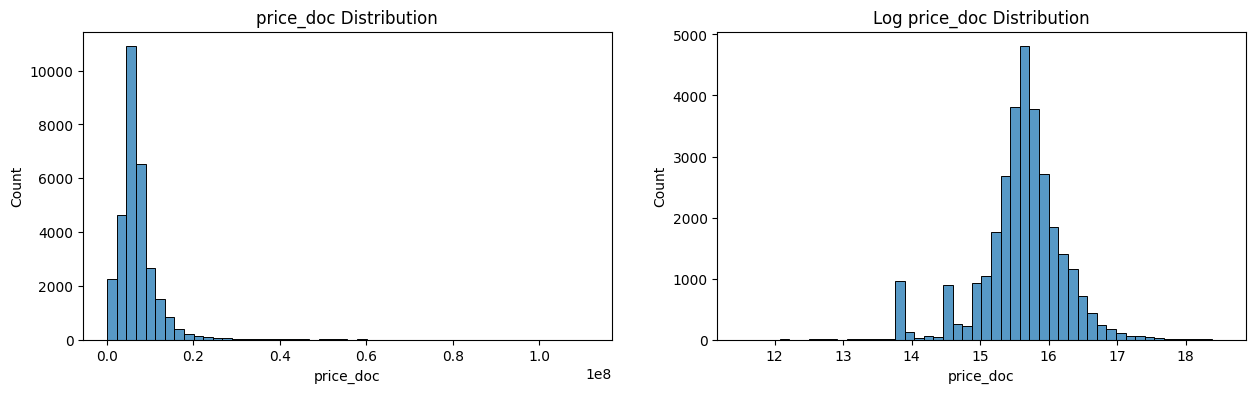

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['price_doc'], bins=50, ax=axes[0])
histplot.set_title('price_doc Distribution');

#гистограмма в логарифмическом масштабе
priceDoc= np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(priceDoc , bins=50, ax=axes[1])
histplot.set_title('Log price_doc Distribution');

In [19]:
def outliers_z_score(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [20]:
outliers, cleaned = outliers_z_score(sber_data, 'price_doc', log_scale=True, left=0.7, right=0.7)
print(f'Число выбросов по методу z-отклонения с послоблением в 0.7 сигмы: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения с послоблением в 0.7 сигмы: 10690
Результирующее число записей: 19781


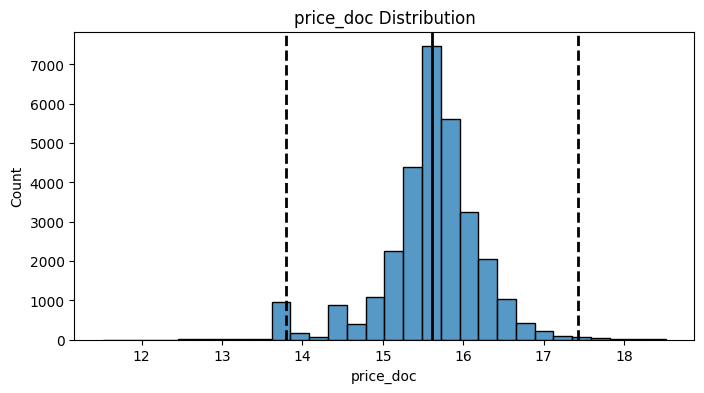

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
priceDoc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(priceDoc, bins=30, ax=ax)
histplot.axvline(priceDoc.mean(), color='k', lw=2)
histplot.axvline(priceDoc.mean()+ 3 * priceDoc.std(), color='k', ls='--', lw=2)
histplot.axvline(priceDoc.mean()- 3 * priceDoc.std(), color='k', ls='--', lw=2)
histplot.set_title('price_doc Distribution');

3. Добавьте фишку с логарифмированием в свою функцию outliers_iqr(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3.

In [22]:
def outliers_iqr(data, feature, log_scale = True, left=3, right=3):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [23]:
outliers, cleaned = outliers_iqr(sber_data, 'price_doc', 1.5, 4)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 629
Результирующее число записей: 29842


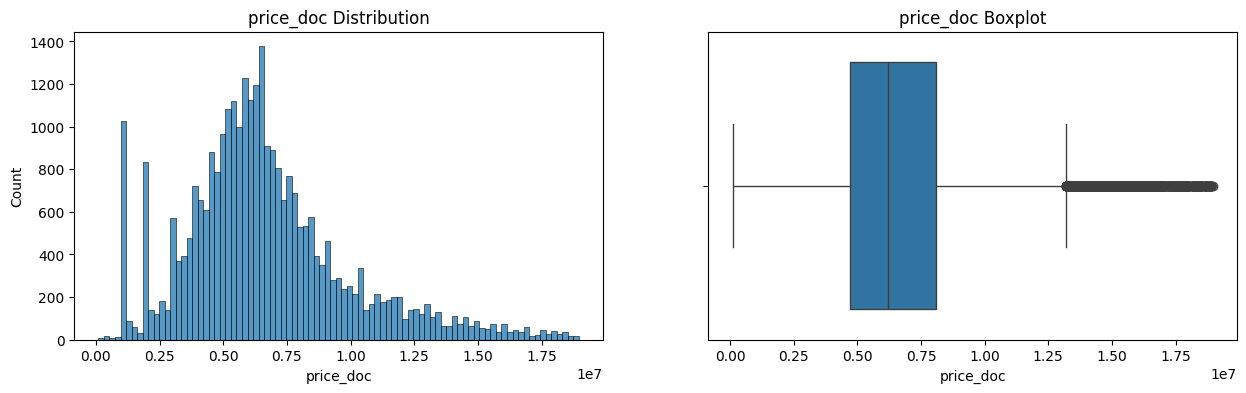

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='price_doc', ax=axes[0]);
histplot.set_title('price_doc Distribution');
boxplot = sns.boxplot(data=cleaned, x='price_doc', ax=axes[1]);
boxplot.set_title('price_doc Boxplot');